# Getting Started

### Constrained Bi-objective Optimization Problem


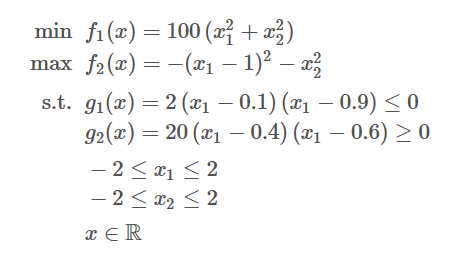

In [2]:
from IPython import display
display.Image(r"C:\Users\marsh\Downloads\Screenshot 2024-12-09 094955.png")

In [3]:
import numpy as np

# Defining Upper and Lower bound for the variables
X1, X2 = np.meshgrid(np.linspace(-2,2,500),np.linspace(-2,2,500))


# Defining the Objectives
# Minimizing F1
F1 = 100*(X1**2 + X2**2)
# Maximizing F2 = miminizing (-F2)
F2 = (X1 - 1)**2 + X2**2

#Sunject to the constraints
G1 = 2*(X1[0]- 0.1)*(X1[0]- 0.9)
G2 = 20*(X1[0]- 0.4)*(X1[0]- 0.6)
# X1[0] in the code restricts the computation to the first row of the meshgrid, because the constraints only depend on X1. 

C:\Users\marsh\AppData\Local\Temp\ipykernel_19308\3531019159.py:9: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  CS.collections[0].set_label("$f_1(x)$")
C:\Users\marsh\AppData\Local\Temp\ipykernel_19308\3531019159.py:12: MatplotlibDeprecationWarning: The collections attribute was deprecated in Matplotlib 3.8 and will be removed in 3.10.
  CS.collections[0].set_label("$f_2(x)$")


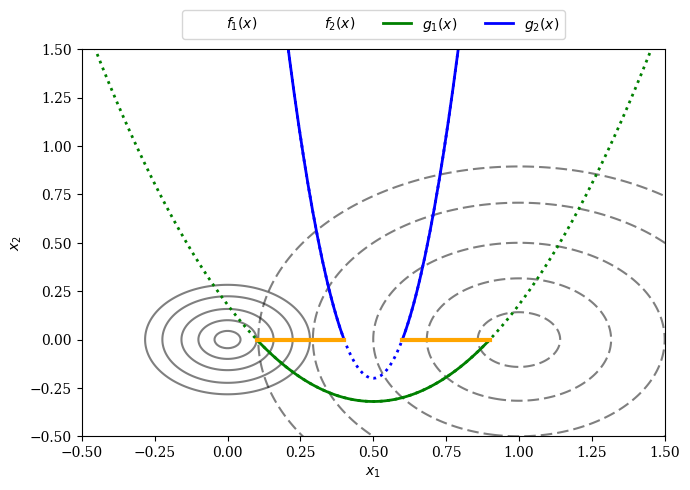

In [4]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

levels = np.array([0.02, 0.1, 0.25, 0.5, 0.8]) #How and why these values are chosen?
plt.figure(figsize=(7, 5))

CS = plt.contour(X1, X2, F1, 10* levels, colors='black', alpha= 0.5)
#The scaling of F1(𝑥) by 10∗levels adjusts for its larger magnitude compared to F2(𝑥)
CS.collections[0].set_label("$f_1(x)$")

CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

#plot the function G1(x) as a green dotted line across the domain of X1
plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted') 
#Highlight only the part of G1(x) that does not violate the constraint G1(x)≤0
#plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")
# X1[0][G1<0] Filters X1 values where G1(𝑥) is less than 0
# G1[G1<0] Filters the corresponding G1(x) values for the above X1 range
#plt.plot(X1[0][X1[0]>0.1], G1[X1[0]>0.1], label="$g_1(x)$", linewidth=2.0, color="green")
plt.plot(X1[0][(X1[0]>0.1) & (X1[0]<0.9)], G1[(X1[0]>0.1) & (X1[0]<0.9)], label="$g_1(x)$", linewidth=2.0, color="green")


plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
# Writing this seperately because for G2 we have two seperate, disjoint valid regions 
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

### Drawing the Pareto-Front

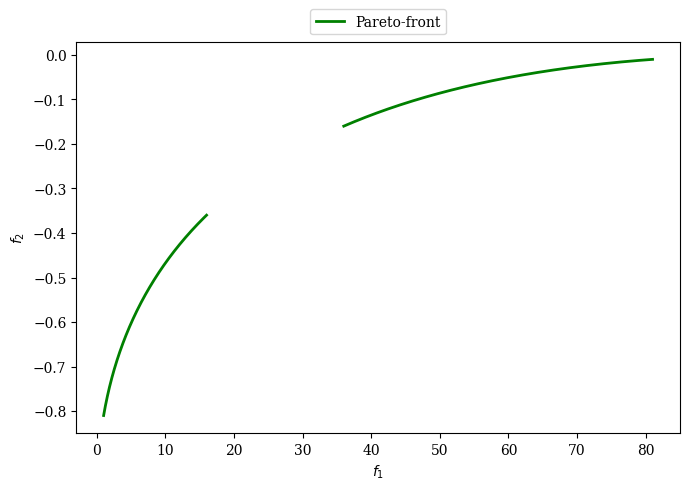

In [5]:
plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()


### Find a Solution Set using Multi-objective Optimization

#### Most optimization frameworks commit to either minimize or maximize all objectives and to have only ≤ or ≥ constraints. In pymoo, each objective function is supposed to be minimized, and each constraint needs to be provided in the form of ≤0.

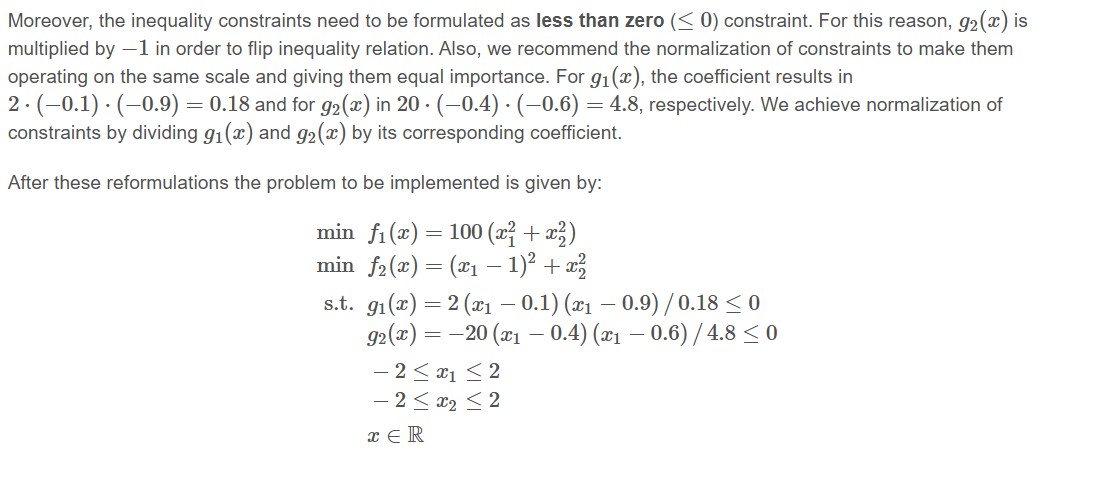

In [6]:
display.Image(r"C:\Users\marsh\Documents\repos\pymoo\img\Screenshot 2024-12-09 184504.png")